In [1]:
import pandas as pd
from sklearn.datasets import load_boston

dataset = load_boston()

c:\users\abhir\appdata\local\programs\python\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
c:\users\abhir\appdata\local\programs\python\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [28]:
print(dataset.data.shape)
print(dataset.target)

(506, 13)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 5

So here we have 506 sample values each for 13 features (dimensions)

In [30]:
print(dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
#df = pd.DataFrame(dataset) this throws error as below as we want dataset.data and not dataset

ValueError: arrays must all be same length

In [31]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
target = pd.DataFrame(dataset.target)

In [32]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [50]:
from sklearn.linear_model import LinearRegression, BayesianRidge, SGDRegressor, Ridge, ARDRegression
from sklearn.model_selection import train_test_split

regressors = {
    "Linear" : LinearRegression(),
    "Bayesian Ridge" : BayesianRidge(),
#    "SGD" : SGDRegressor(random_state=42),
    "Ridge" : Ridge(random_state=42),
    "Automatic Relevance Determination" : ARDRegression()
}
print('Regressors loaded successfully!')

x_train,x_test,y_train,y_test = train_test_split(df, target, test_size =0.2, random_state=42) #cannot stratify!
print('Training and Testing data split successfully!')

Regressors loaded successfully!
Training and Testing data split successfully!


In [51]:
scores= []
name = []
for i,(clf_name,clf) in enumerate(regressors.items()):
    if clf_name == "Linear":
        name.append("Lin_Reg")
        clf = clf.fit(x_train,y_train)
        score = clf.score(x_test,y_test)
        scores.append(score)
    elif clf_name == "Bayesian Ridge":
        name.append("Bayes")
        clf = clf.fit(x_train,y_train)
        score = clf.score(x_test,y_test)
        scores.append(score)
    elif clf_name=="SGD":
       name.append("SGD")
       clf = clf.fit(x_train,y_train)
       score = clf.score(x_test,y_test)
       scores.append(score)
    elif clf_name == "Ridge":
        name.append("Ridge")
        clf = clf.fit(x_train,y_train)
        score = clf.score(x_test,y_test)
        scores.append(score)
    else:
        name.append("ARD")
        clf = clf.fit(x_train,y_train)
        score = clf.score(x_test,y_test)
        scores.append(score)

c:\users\abhir\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<BarContainer object of 4 artists>

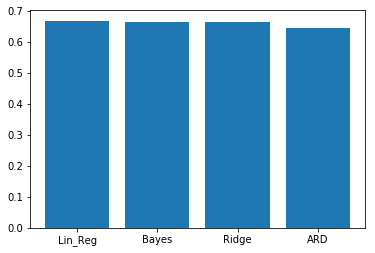

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(name,scores)

In [54]:
for i in range(len(name)):
    print('Classifier : {} , Score : {}'.format(name[i],scores[i]))

Classifier : Lin_Reg , Score : 0.6684825753971639
Classifier : Bayes , Score : 0.6636256730905887
Classifier : Ridge , Score : 0.6659608075261688
Classifier : ARD , Score : 0.6450382176821265
